In [277]:
library(tidyverse)
library(ggplot2)
library(patchwork)
library(geneBasisR)

In [278]:
data.frame(gene = c("Pdgfra", # (OPC)
"Bmp4", # (NFOL)
"Plp1", # (MOL)
"Aqp4", # (Astro)
"Rax", # (tany)
"Agrp",
"Pomc",
"Htr3b",
"Lef1",
"Lmx1a"))

gene
<chr>
Pdgfra
Bmp4
Plp1
Aqp4
Rax
Agrp
Pomc
Htr3b
Lef1


In [84]:
cs_combo = qs::qread('_targets/objects/combined_csss_sw')
head(cs_combo)

name,labels,polar_label,mean_cell_score.labels,mean_cell_score.polar_label
<chr>,<chr>,<chr>,<dbl>,<dbl>
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.neg,0.9001022,0.9040067
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.none,0.9001022,0.9004029
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.pos,0.9001022,0.8923469
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes-b1_Tanycytes,a2_Tanycytes__b1_Tanycytes.none,0.8821602,0.8821602
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes,a2_Tanycytes.none,0.8840801,0.8833715
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes,a2_Tanycytes.pos,0.8840801,0.8896229


In [5]:
dim(cs_combo)

[1] 41040     5

In [90]:
cs_combo = cs_combo %>%
rowwise %>%
mutate(selection = str_split(name, fixed('___'))[[1]][2]) %>%
mutate(selection = str_replace(selection, fixed('__sw'), '')) %>%
mutate(evaluation = case_when(str_detect(name, fixed('eval.other')) ~ 'other',
                              str_detect(name, fixed('eval.neuron_40k')) ~ 'neuron_40k',
                              str_detect(name, fixed('eval.all_40k')) ~ 'all_40k')) %>%
ungroup()

head(cs_combo)

name,labels,polar_label,mean_cell_score.labels,mean_cell_score.polar_label,selection,evaluation
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.neg,0.9001022,0.9040067,all_40k.10__neuron_40k.10__other.80,all_40k
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.none,0.9001022,0.9004029,all_40k.10__neuron_40k.10__other.80,all_40k
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a1_Tany-Astrocytes,a1_Tany__Astrocytes.pos,0.9001022,0.8923469,all_40k.10__neuron_40k.10__other.80,all_40k
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes-b1_Tanycytes,a2_Tanycytes__b1_Tanycytes.none,0.8821602,0.8821602,all_40k.10__neuron_40k.10__other.80,all_40k
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes,a2_Tanycytes.none,0.8840801,0.8833715,all_40k.10__neuron_40k.10__other.80,all_40k
eval.all_40k___all_40k.10__neuron_40k.10__other.80__sw,a2_Tanycytes,a2_Tanycytes.pos,0.8840801,0.8896229,all_40k.10__neuron_40k.10__other.80,all_40k


In [105]:
cs_combo_summary_all_40k = cs_combo %>%
filter(evaluation == 'all_40k') %>%
group_by(name) %>%
mutate(mean_mcs_labels_all_40k = mean(mean_cell_score.labels)) %>%
mutate(mean_mcs_polar_label_all_40k = mean(mean_cell_score.polar_label)) %>%
ungroup %>%
select(selection, evaluation, mean_mcs_labels_all_40k, mean_mcs_polar_label_all_40k) %>%
distinct %>%
select(-evaluation)

cs_combo_summary_all_40k %>% head

selection,mean_mcs_labels_all_40k,mean_mcs_polar_label_all_40k
<chr>,<dbl>,<dbl>
all_40k.10__neuron_40k.10__other.80,0.9211101,0.9209223
all_40k.10__neuron_40k.20__other.70,0.9232407,0.9235360
all_40k.10__neuron_40k.30__other.60,0.9247274,0.9247952
all_40k.10__neuron_40k.40__other.50,0.9252460,0.9262283
all_40k.10__neuron_40k.50__other.40,0.9256609,0.9272694
all_40k.10__neuron_40k.60__other.30,0.9263254,0.9277647


In [106]:
cs_combo_summary_other = cs_combo %>%
filter(evaluation == 'other') %>%
group_by(name) %>%
mutate(mean_mcs_labels_other = mean(mean_cell_score.labels)) %>%
mutate(mean_mcs_polar_label_other = mean(mean_cell_score.polar_label)) %>%
ungroup %>%
select(selection, evaluation, mean_mcs_labels_other, mean_mcs_polar_label_other) %>%
distinct %>%
select(-evaluation)

cs_combo_summary_other %>% head

selection,mean_mcs_labels_other,mean_mcs_polar_label_other
<chr>,<dbl>,<dbl>
all_40k.10__neuron_40k.10__other.80,0.9240680,0.9137949
all_40k.10__neuron_40k.20__other.70,0.9199056,0.9111607
all_40k.10__neuron_40k.30__other.60,0.9181330,0.9075861
all_40k.10__neuron_40k.40__other.50,0.9137609,0.9065337
all_40k.10__neuron_40k.50__other.40,0.9102581,0.9040917
all_40k.10__neuron_40k.60__other.30,0.9057104,0.8993109


In [107]:
cs_combo_summary_neuron_40k = cs_combo %>%
filter(evaluation == 'neuron_40k') %>%
group_by(name) %>%
mutate(mean_mcs_labels_neuron_40k = mean(mean_cell_score.labels)) %>%
mutate(mean_mcs_polar_label_neuron_40k = mean(mean_cell_score.polar_label)) %>%
ungroup %>%
select(selection, evaluation, mean_mcs_labels_neuron_40k, mean_mcs_polar_label_neuron_40k) %>%
distinct %>%
select(-evaluation)

cs_combo_summary_neuron_40k %>% head

selection,mean_mcs_labels_neuron_40k,mean_mcs_polar_label_neuron_40k
<chr>,<dbl>,<dbl>
all_40k.10__neuron_40k.10__other.80,0.9036968,0.9039646
all_40k.10__neuron_40k.20__other.70,0.9087464,0.9095028
all_40k.10__neuron_40k.30__other.60,0.9118526,0.9124607
all_40k.10__neuron_40k.40__other.50,0.9151430,0.9155520
all_40k.10__neuron_40k.50__other.40,0.9174558,0.9180952
all_40k.10__neuron_40k.60__other.30,0.9185742,0.9191055


In [133]:
cs_combo_summary = cs_combo_summary_all_40k %>%
left_join(cs_combo_summary_neuron_40k) %>% 
left_join(cs_combo_summary_other) %>%
rowwise() %>%
mutate(product_mmcs_labels = mean_mcs_labels_all_40k * mean_mcs_labels_neuron_40k * mean_mcs_labels_other) %>%
mutate(product_mmcs_pl = mean_mcs_polar_label_all_40k * mean_mcs_polar_label_neuron_40k * mean_mcs_polar_label_other) %>%
mutate(product_mmcs_n.o_labels = mean_mcs_labels_neuron_40k * mean_mcs_labels_other) %>%
mutate(product_mmcs_n.o_pl = mean_mcs_polar_label_neuron_40k * mean_mcs_polar_label_other) %>%
ungroup %>%
arrange(desc(product_mmcs_n.o_labels))

head(cs_combo_summary)

Joining, by = "selection"
Joining, by = "selection"


selection,mean_mcs_labels_all_40k,mean_mcs_polar_label_all_40k,mean_mcs_labels_neuron_40k,mean_mcs_polar_label_neuron_40k,mean_mcs_labels_other,mean_mcs_polar_label_other,product_mmcs_labels,product_mmcs_pl,product_mmcs_n.o_labels,product_mmcs_n.o_pl
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
other.70__neuron_40k.30__all_40k.0,0.9251690,0.9249014,0.9123279,0.9127300,0.9195479,0.9171902,0.7761513,0.7742784,0.8389293,0.8371470
other.70__all_40k.10__neuron_40k.20,0.9251689,0.9249013,0.9123280,0.9127301,0.9195468,0.9171888,0.7761503,0.7742773,0.8389283,0.8371459
all_40k.10__other.70__neuron_40k.20,0.9248340,0.9247632,0.9103636,0.9110107,0.9213982,0.9133865,0.7757576,0.7694999,0.8388074,0.8321048
other.60__all_40k.10__neuron_40k.30,0.9272448,0.9269679,0.9148155,0.9156527,0.9164756,0.9087704,0.7774078,0.7713468,0.8384062,0.8321181
other.70__all_40k.20__neuron_40k.10,0.9254937,0.9253022,0.9117536,0.9123029,0.9195138,0.9151213,0.7759061,0.7725050,0.8383700,0.8348678
all_40k.30__other.50__neuron_40k.20,0.9258739,0.9259787,0.9137890,0.9142262,0.9173843,0.9100371,0.7761560,0.7703955,0.8382957,0.8319798


In [134]:
colnames(cs_combo_summary) %>% dput

c("selection", "mean_mcs_labels_all_40k", "mean_mcs_polar_label_all_40k", 
"mean_mcs_labels_neuron_40k", "mean_mcs_polar_label_neuron_40k", 
"mean_mcs_labels_other", "mean_mcs_polar_label_other", "product_mmcs_labels", 
"product_mmcs_pl", "product_mmcs_n.o_labels", "product_mmcs_n.o_pl"
)


In [135]:
cols = c("mean_mcs_labels_all_40k", "mean_mcs_polar_label_all_40k", 
"mean_mcs_labels_neuron_40k", "mean_mcs_polar_label_neuron_40k", 
"mean_mcs_labels_other", "mean_mcs_polar_label_other", "product_mmcs_labels", 
"product_mmcs_pl", "product_mmcs_n.o_labels", "product_mmcs_n.o_pl")

cs_combo_summary_long = cs_combo_summary %>% pivot_longer(cols=cols) %>% filter(!str_detect(name, 'labels'))
head(cs_combo_summary_long)

selection,name,value
<chr>,<chr>,<dbl>
other.70__neuron_40k.30__all_40k.0,mean_mcs_polar_label_all_40k,0.9249014
other.70__neuron_40k.30__all_40k.0,mean_mcs_polar_label_neuron_40k,0.9127300
other.70__neuron_40k.30__all_40k.0,mean_mcs_polar_label_other,0.9171902
other.70__neuron_40k.30__all_40k.0,product_mmcs_pl,0.7742784
other.70__neuron_40k.30__all_40k.0,product_mmcs_n.o_pl,0.8371470
other.70__all_40k.10__neuron_40k.20,mean_mcs_polar_label_all_40k,0.9249013


In [275]:
top_frac_cs_combo_summmary = top_frac(cs_combo_summary, 0.05, product_mmcs_n.o_pl)
top_frac_cs_combo_summmary_long = top_frac_cs_combo_summmary %>% pivot_longer(cols=cols) %>% filter(!str_detect(name, 'labels'))

In [276]:
top_frac_cs_combo_summmary 

selection,mean_mcs_labels_all_40k,mean_mcs_polar_label_all_40k,mean_mcs_labels_neuron_40k,mean_mcs_polar_label_neuron_40k,mean_mcs_labels_other,mean_mcs_polar_label_other,product_mmcs_labels,product_mmcs_pl,product_mmcs_n.o_labels,product_mmcs_n.o_pl
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
other.70__neuron_40k.30__all_40k.0,0.9251690,0.9249014,0.9123279,0.9127300,0.9195479,0.9171902,0.7761513,0.7742784,0.8389293,0.8371470
other.70__all_40k.10__neuron_40k.20,0.9251689,0.9249013,0.9123280,0.9127301,0.9195468,0.9171888,0.7761503,0.7742773,0.8389283,0.8371459
all_40k.10__other.70__neuron_40k.20,0.9248340,0.9247632,0.9103636,0.9110107,0.9213982,0.9133865,0.7757576,0.7694999,0.8388074,0.8321048
other.60__all_40k.10__neuron_40k.30,0.9272448,0.9269679,0.9148155,0.9156527,0.9164756,0.9087704,0.7774078,0.7713468,0.8384062,0.8321181
other.70__all_40k.20__neuron_40k.10,0.9254937,0.9253022,0.9117536,0.9123029,0.9195138,0.9151213,0.7759061,0.7725050,0.8383700,0.8348678
all_40k.30__other.50__neuron_40k.20,0.9258739,0.9259787,0.9137890,0.9142262,0.9173843,0.9100371,0.7761560,0.7703955,0.8382957,0.8319798
other.60__neuron_40k.40__all_40k.0,0.9273354,0.9270830,0.9149597,0.9156869,0.9158856,0.9084953,0.7771056,0.7712378,0.8379984,0.8318972
all_40k.10__other.60__neuron_40k.30,0.9257831,0.9258995,0.9138819,0.9143798,0.9169343,0.9097860,0.7757781,0.7702465,0.8379696,0.8318899
other.70__neuron_40k.10__all_40k.20,0.9241034,0.9240987,0.9090506,0.9096274,0.9209277,0.9190277,0.7736315,0.7725214,0.8371699,0.8359728


Warning message:
“Removed 10 rows containing missing values (geom_bar).”


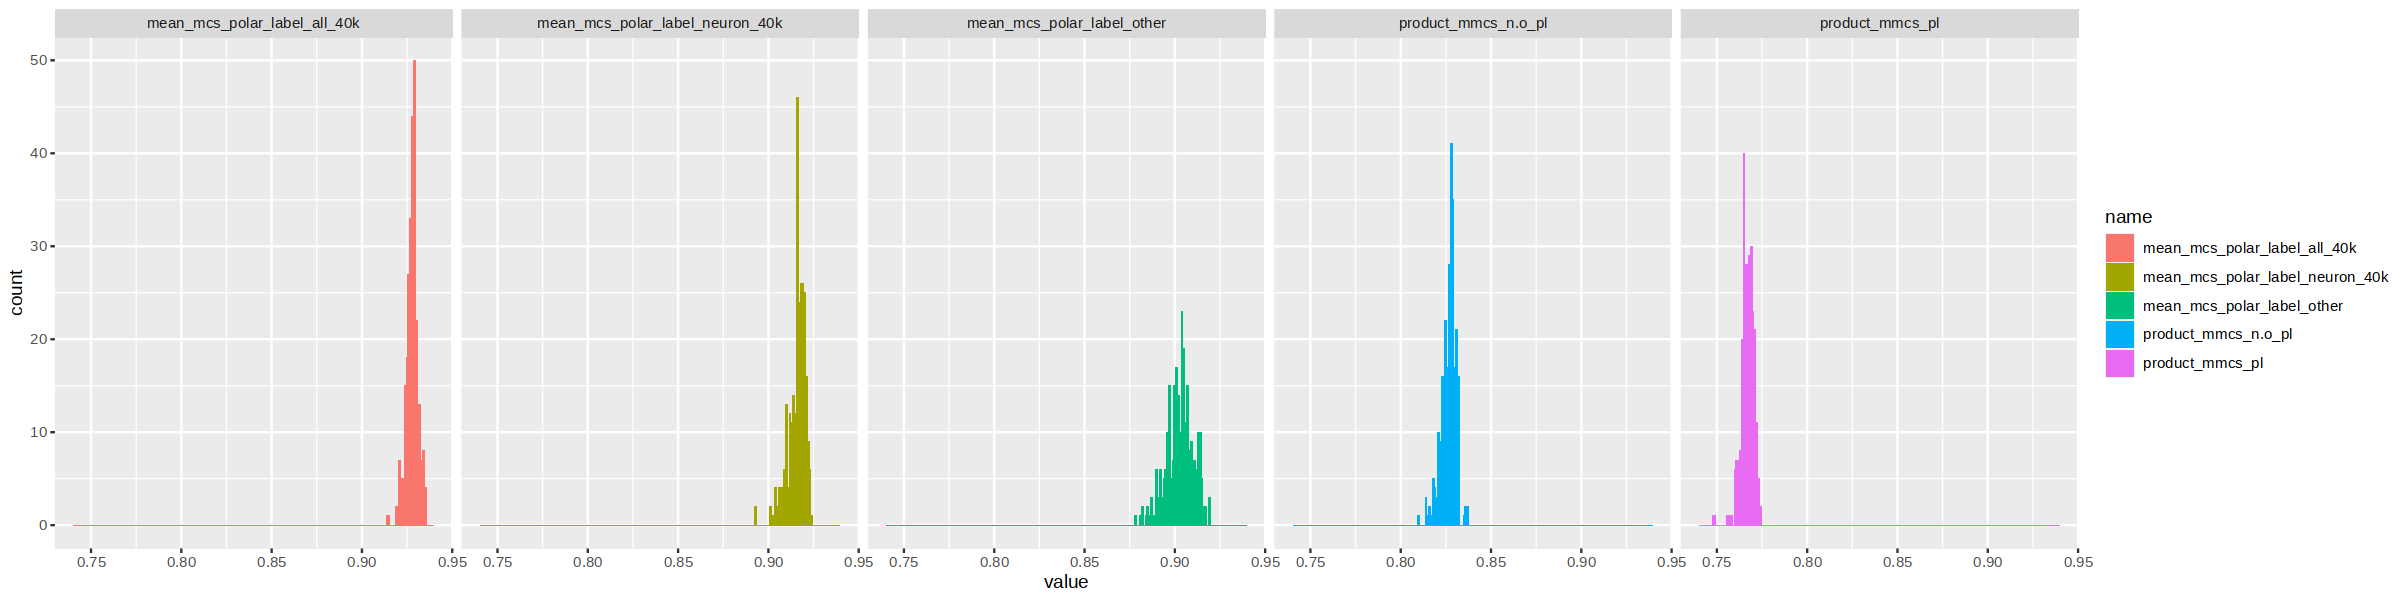

In [252]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(cs_combo_summary_long, aes(value, fill=name)) +
  geom_histogram(binwidth=0.001) + facet_wrap(vars(name), ncol = 5) + xlim(0.74, 0.94)

Warning message:
“Removed 10 rows containing missing values (geom_bar).”


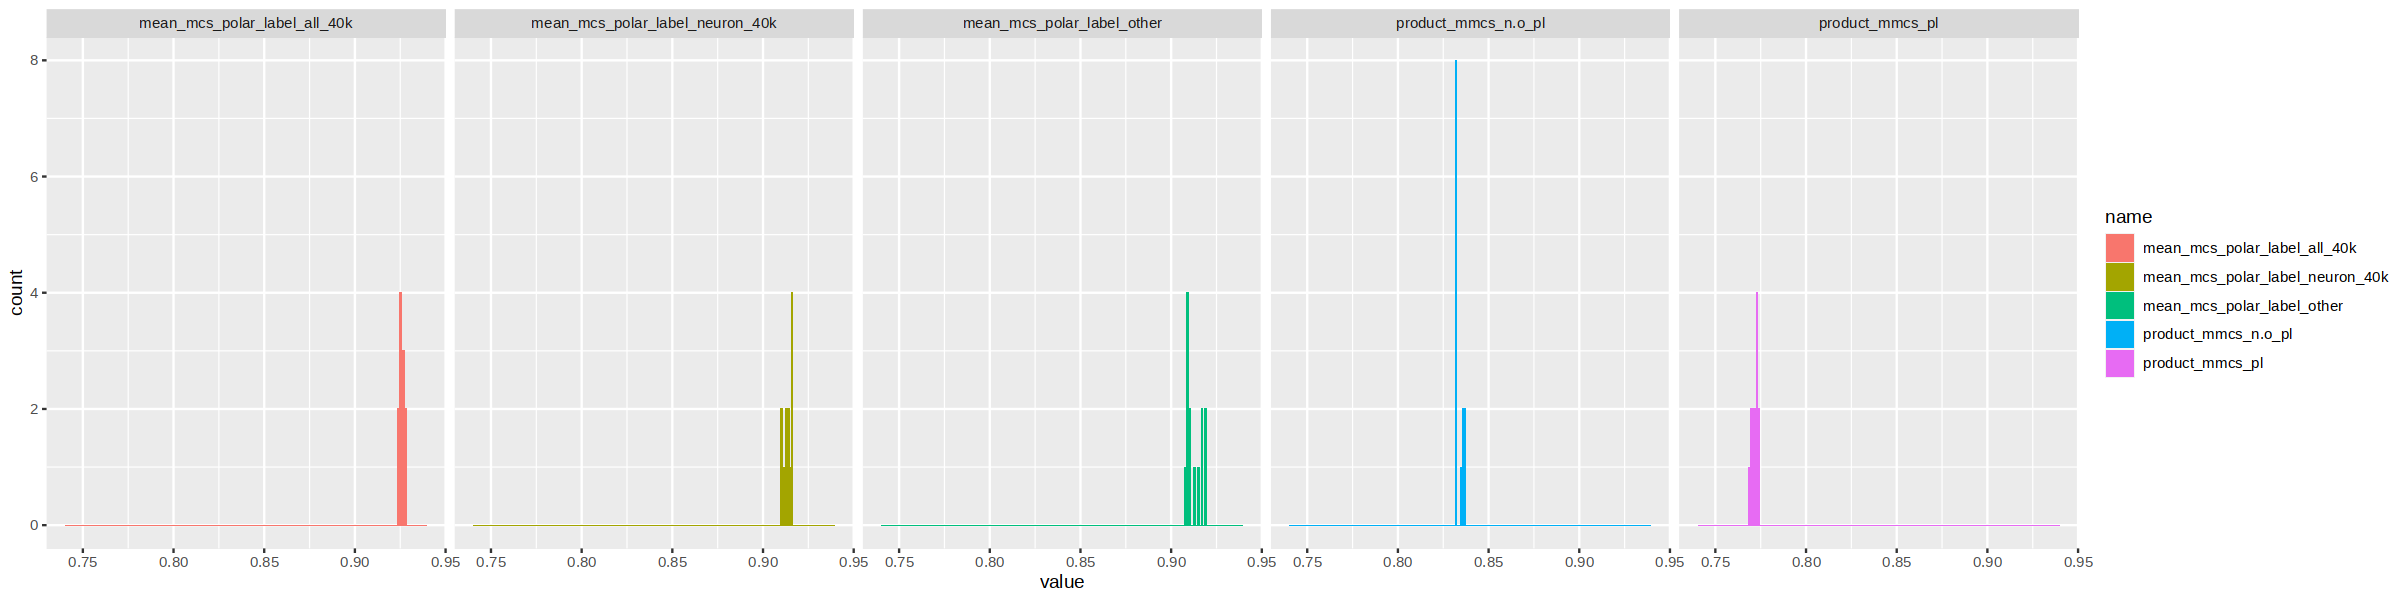

In [253]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(top_frac_cs_combo_summmary_long, aes(value, fill=name)) +
  geom_histogram(binwidth=0.001) + facet_wrap(vars(name), ncol = 5)  + xlim(0.74, 0.94)

In [271]:
selection = 'neuron_40k.20__all_40k.80__other.0'

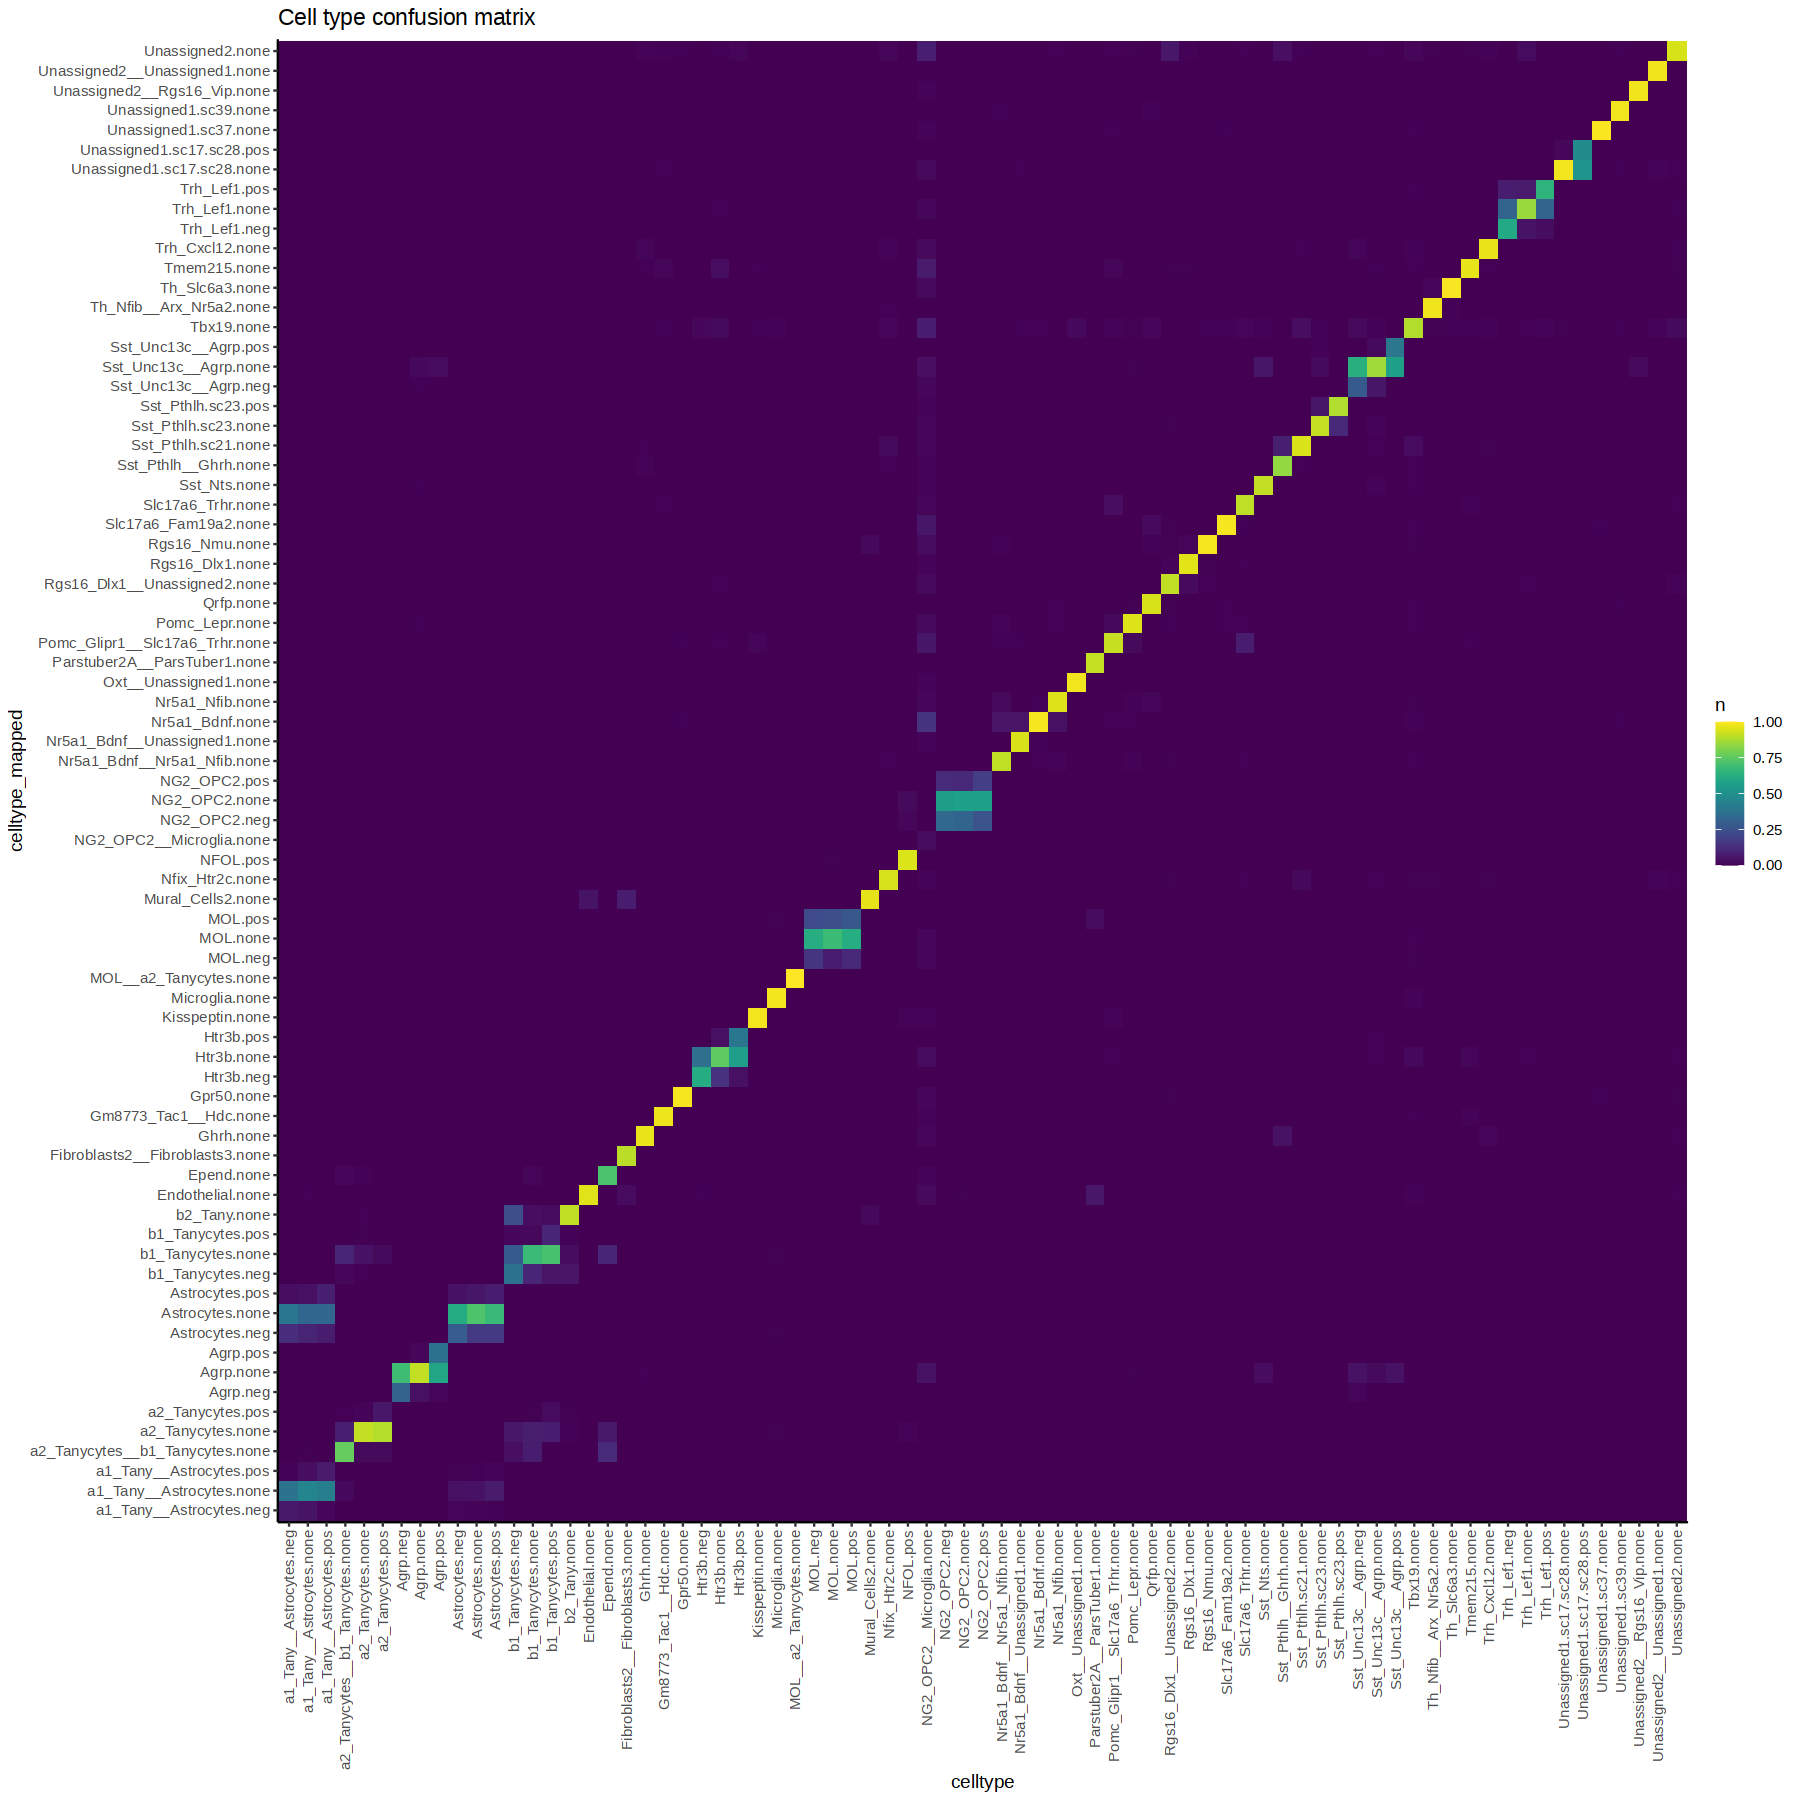

In [272]:
options(repr.plot.width=15, repr.plot.height=15)
evaluation = 'all_40k'
path_to_file = paste0('_targets/objects/ctm_3rd_eval.', evaluation, '___', selection, '__sw')
ctm = qs::qread(path_to_file)
ctm$mapping = ctm$mapping %>%
mutate(celltype = factor(celltype, levels=sort(unique(celltype)))) %>%
arrange(celltype)
p = plot_mapping_heatmap(ctm$mapping, title = "Cell type confusion matrix")
p

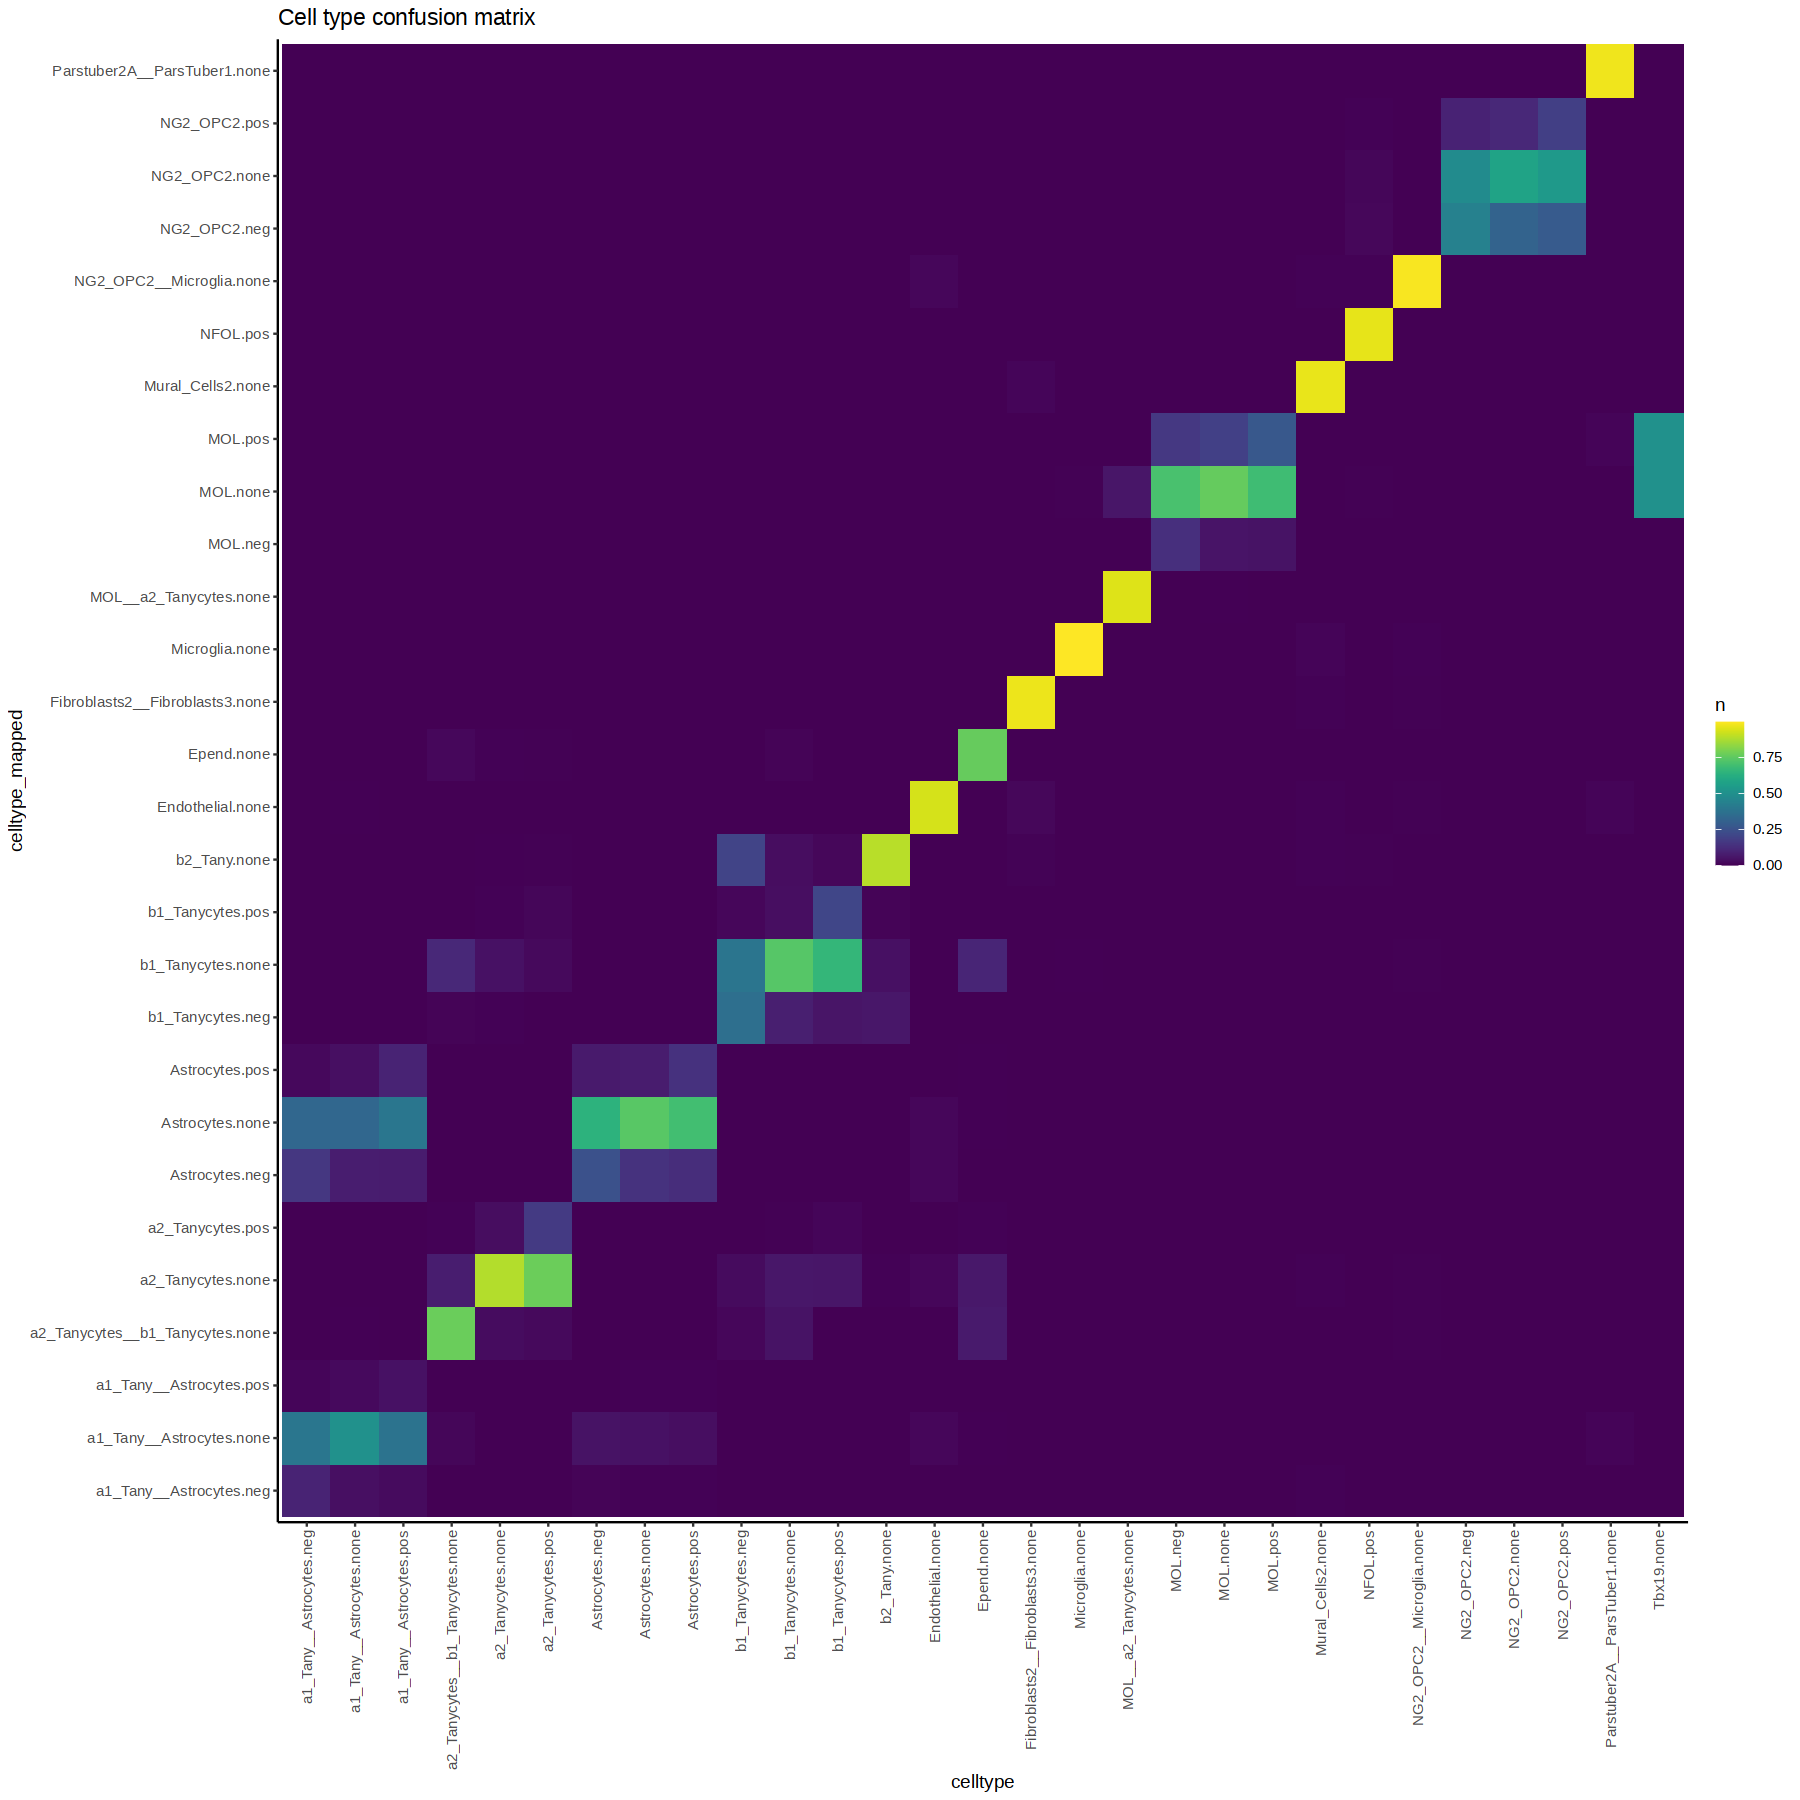

In [273]:
options(repr.plot.width=15, repr.plot.height=15)
evaluation = 'other'
path_to_file = paste0('_targets/objects/ctm_3rd_eval.', evaluation, '___', selection, '__sw')
ctm = qs::qread(path_to_file)
ctm$mapping = ctm$mapping %>%
mutate(celltype = factor(celltype, levels=sort(unique(celltype)))) %>%
arrange(celltype)
p = plot_mapping_heatmap(ctm$mapping, title = "Cell type confusion matrix")
p

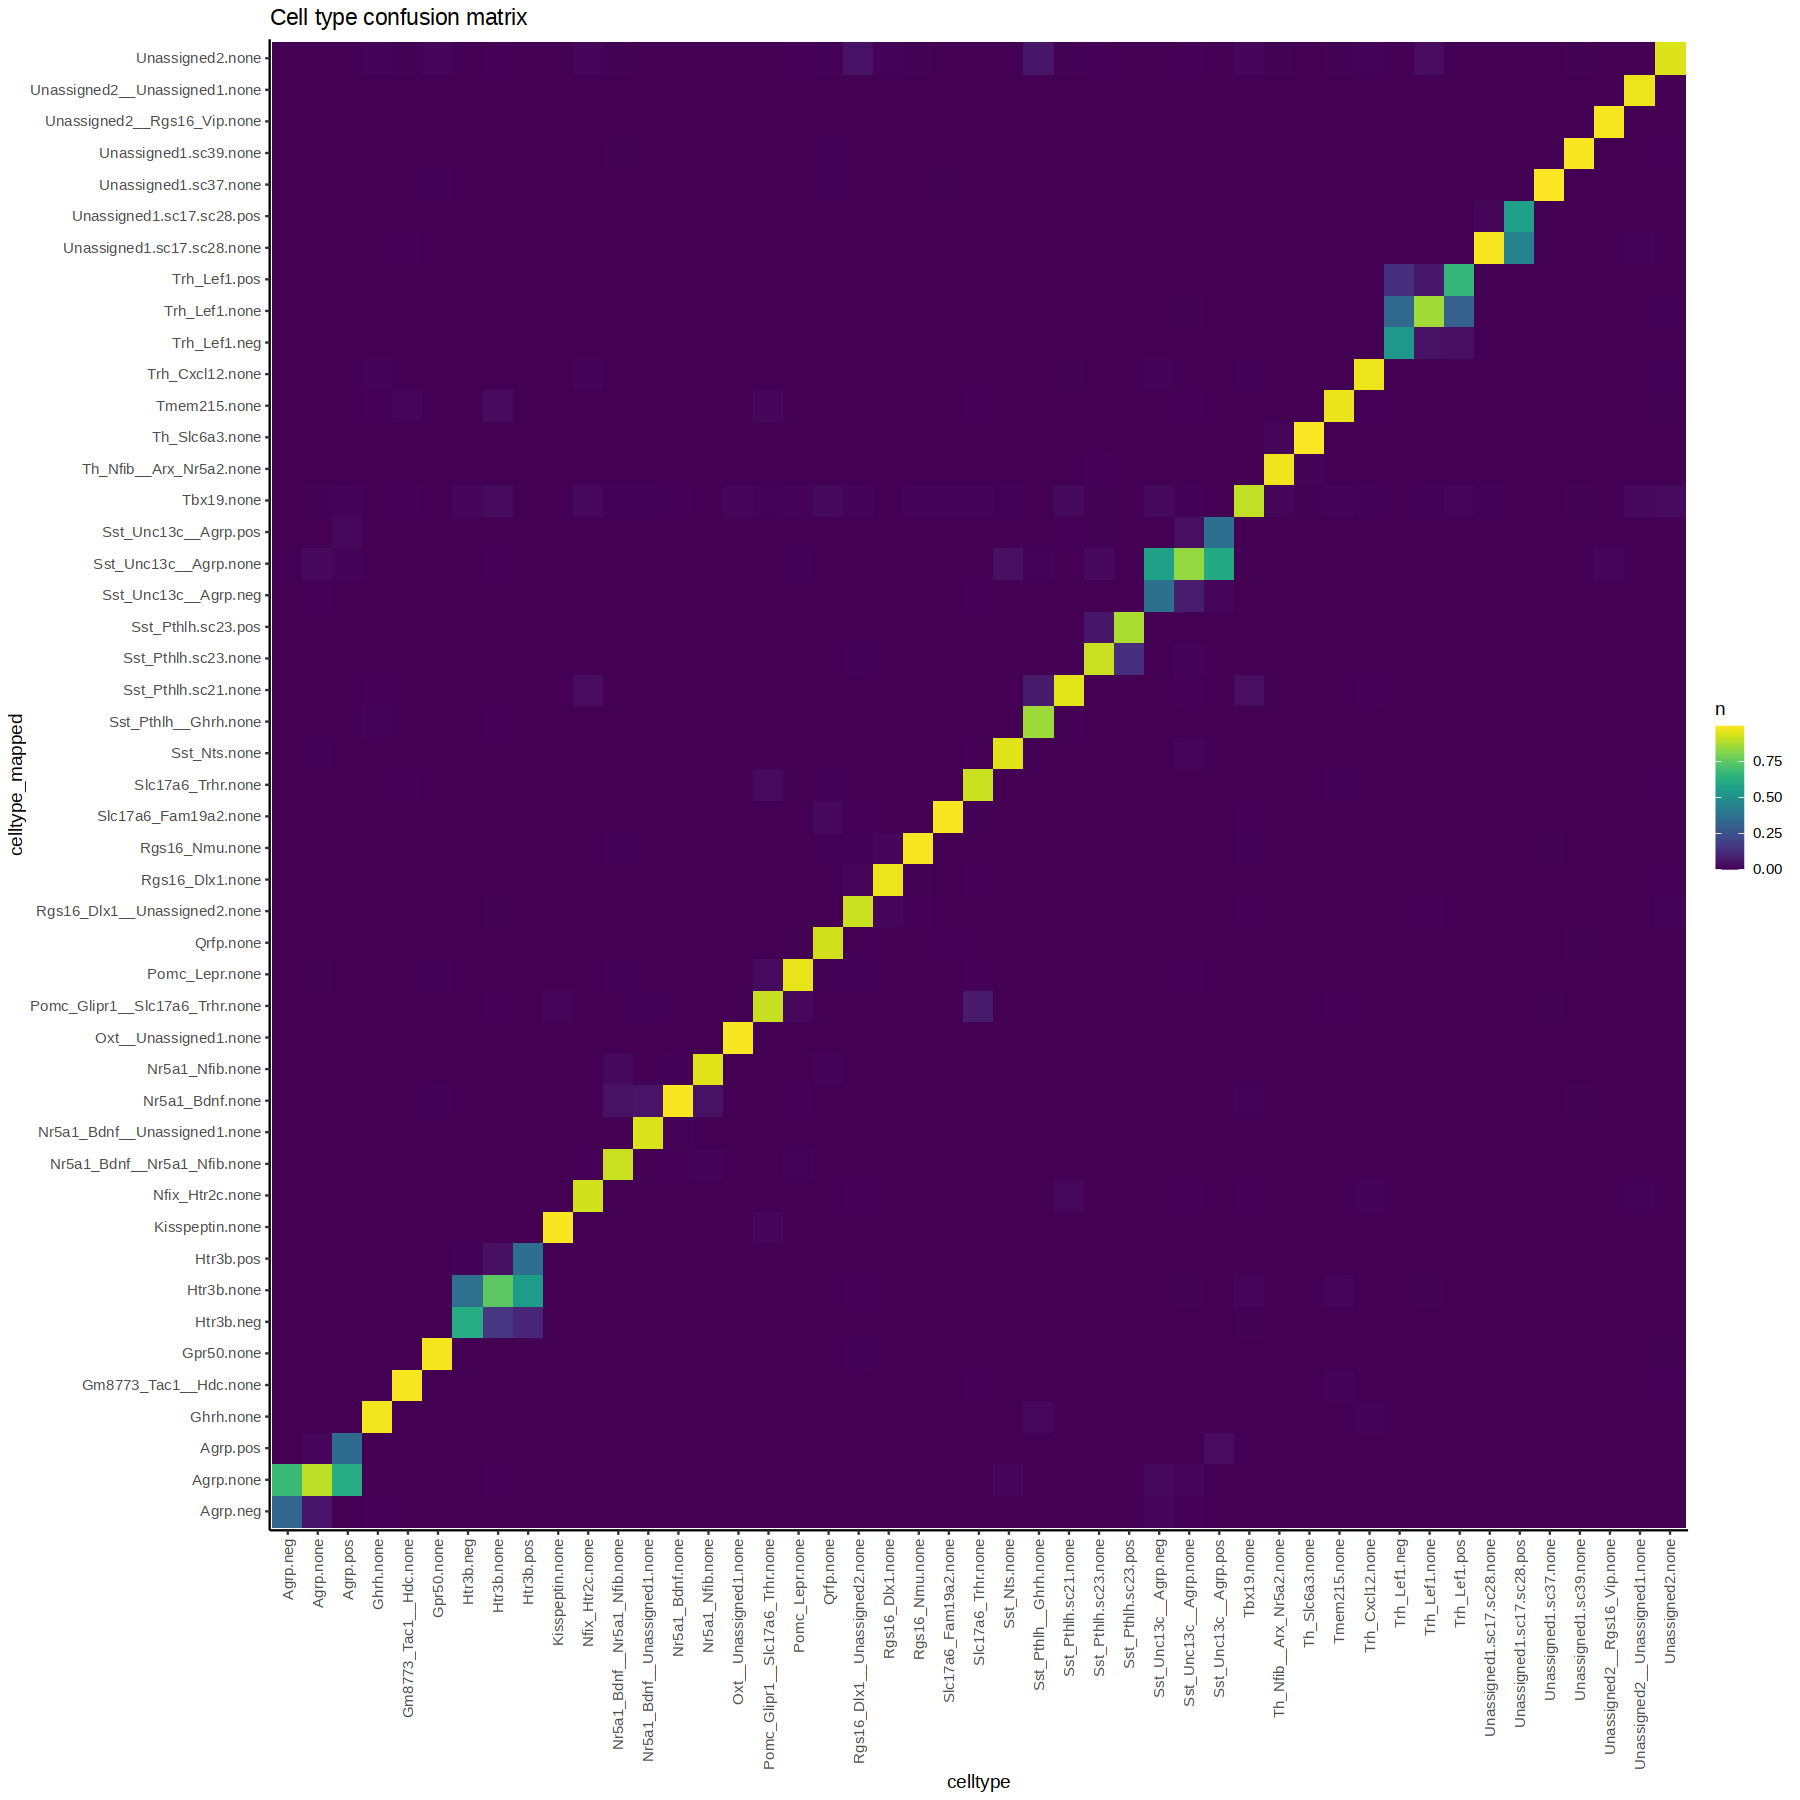

In [274]:
options(repr.plot.width=15, repr.plot.height=15)
evaluation = 'neuron_40k'
path_to_file = paste0('_targets/objects/ctm_3rd_eval.', evaluation, '___', selection, '__sw')
ctm = qs::qread(path_to_file)
ctm$mapping = ctm$mapping %>%
mutate(celltype = factor(celltype, levels=sort(unique(celltype)))) %>%
arrange(celltype)
p = plot_mapping_heatmap(ctm$mapping, title = "Cell type confusion matrix")
p

In [248]:
path_to_file

[1] "_targets/objects/ctm_3rd_eval.neuron_40k___all_40k.90__neuron_40k.10__other.0__sw"